### BANK MARKETING : Predicting Whether The Customer Will Subscribe To Term Deposit 

## Import Necessary Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

This dataset contains the data like 'ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign','pdays', 'previous', 'poutcome' and 'subscribed'

* ID: Unique client ID
* age: Age of the client
* job: Type of job
* marital: Marital status of the client
* education: Education level
* default: Credit in default.
* housing: Housing loan
* loan: Personal loan
* contact: Type of communication
* month: Contact month
* day_of_week: Day of week of contact
* duration: Contact duration
* campaign: number of contacts performed during this campaign to the client
* pdays: number of days that passed by after the client was last contacted
* previous: number of contacts performed before this campaign
* poutcome: outcome of the previous marketing campaign

## Import the dataset

In [97]:
# Loading the train and test dataset
train = pd.read_csv("termdeposit_train.csv")
 
test = pd.read_csv("termdeposit_test.csv")

This dataset contains the detials of customers in which both numerical and categorical data are present. Here "subscribed" is the target variable which contains 2 categories "Yes" or 'No'. 

In [98]:
train.head(2)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no


In [99]:
test.head(2)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown


## Exploratory Data Analysis (EDA)

In [100]:
print("The dimesnions of the train dataset",train.shape)
print("The dimesnions of the test dataset" ,test.shape)

The dimesnions of the train dataset (31647, 18)
The dimesnions of the test dataset (13564, 17)


**Checking the columns of each dataset**

In [101]:
# train dataset
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [102]:
# test dataset
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Hence, 'Subscribed' is the target variable.

**Checking the count, null values and data types each dataset columns**

In [103]:
# Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [104]:
# Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


**Checking the missing value each dataset columns**

In [105]:
# Train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [106]:
# Test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

And we can see there are no null values present in the dataset.

**Remove the duplicates values of each dataset columns**

In [107]:
# Train dataset
train.duplicated().sum()

0

In [108]:
# Test dataset
test.duplicated().sum()

0

There are no duplicates in both dataset.

**Checking the unique value of each dataset columns**

In [109]:
# Train dataset
train.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [110]:
# Test dataset
test.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

Tere are the unique values present in the dataset. Here ID column has the data of unique ID which can be drop in both dataset.

**Checking the value count of each dataset columns**

In [111]:
# Train dataset
for i in train:
    print(train[i].value_counts())
    print('\n')

ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64


age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120  

In [112]:
# Test dataset
for i in test:
    print(test[i].value_counts())
    print('\n')

ID
38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: count, Length: 13564, dtype: int64


age
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: count, Length: 75, dtype: int64


job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: count, dtype: int64


marital
married     8119
single      3868
divorced    1577
Name: count, dtype: int64


education
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: count, dtype: int64


default
no     13334
yes      230
Name: count, dtype: int64


balance
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 818

* As we can see most records have “pdays” as -1. This means most records indicate the particular person was not contacted before. Check later what can do for this.

* We can also ssee

In [113]:
train['pdays'].value_counts()

pdays
-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: count, Length: 509, dtype: int64

In [114]:
test['pdays'].value_counts()

pdays
-1      11030
 182       49
 92        47
 181       42
 183       41
        ...  
 378        1
 3          1
 34         1
 215        1
 163        1
Name: count, Length: 422, dtype: int64

As we can see most records have “pdays” as -1. This means most records indicate the particular person was not contacted before.

In [115]:
# Count of -1 in train and test dataset
print(25924+11030)

# Count of rows in train and test dataset

print(31647+13564)

# Percentage of data which only contains other values 
print(((45211-36954)/45211)*100)

36954
45211
18.263254517705867


We can obeserve that 82% of the pdays columns contains -1 and only 18% has other data. Let’s convert this “pdays” column into a binary categorical column “has_contacted” with 2 values:

False ( pdays is -1 that is, the person was not contacted)

True ( pdays is not -1 that is, the person was contacted before)

In [116]:
# Create new columns and remove pdays columns in train dataset

train['has_contacted'] = np.where(train['pdays']!= -1, True, False)

train.drop(['pdays'],axis=1,inplace=True)

train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed,has_contacted
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,0,unknown,no,False
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,0,unknown,no,False
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,0,unknown,no,False
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,3,success,yes,True
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,0,unknown,no,False


In [117]:
# Create new columns and remove pdays columns in train dataset

test['has_contacted'] = np.where(test['pdays']!= -1, True, False)

test.drop(['pdays'],axis=1,inplace=True)

test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,has_contacted
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,0,unknown,False
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,0,unknown,False
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,0,unknown,False
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,0,unknown,False
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,0,unknown,False


**Convert datatypes**

In [118]:
# check the datatypes of new columns has_contacted in train dataset and test dataset
print("Train dataset : ",train['has_contacted'].dtypes)
print("Test dataset :",test['has_contacted'].dtypes)

Train dataset :  bool
Test dataset : bool


In [119]:
# check the datatypes of new columns has_contacted in train dataset and test dataset
train['has_contacted'] = train['has_contacted'].astype('object')
test['has_contacted'] = test['has_contacted'].astype('object')

In [120]:
# check again the datatypes of new columns has_contacted in train dataset and test dataset
print("Train dataset : ",train['has_contacted'].dtypes)
print("Test dataset :",test['has_contacted'].dtypes)

Train dataset :  object
Test dataset : object


**Remove unwanted columns**

In [121]:
# Train dataset
train = train.drop(columns=['ID','duration','campaign','day','month','previous'],axis=1)

In [122]:
# Test dataset
test = test.drop(columns=['ID','duration','campaign','day','month','previous'],axis=1)

We can't predict how long we gonna talk to the client (duration) and how many calls would require to get the answer about deposit (campaign) and day,month and previous.

In [123]:
print("Train dataset",train.shape)
print("Test dataset",train.shape)

Train dataset (31647, 12)
Test dataset (31647, 12)


In [124]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,subscribed,has_contacted
0,56,admin.,married,unknown,no,1933,no,no,telephone,unknown,no,False
1,31,unknown,married,secondary,no,3,no,no,cellular,unknown,no,False
2,27,services,married,secondary,no,891,yes,no,cellular,unknown,no,False
3,57,management,divorced,tertiary,no,3287,no,no,cellular,success,yes,True
4,31,technician,married,secondary,no,119,yes,no,cellular,unknown,no,False


In [125]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,has_contacted
0,32,services,married,secondary,no,118,yes,no,cellular,unknown,False
1,78,retired,divorced,primary,no,2787,no,no,telephone,unknown,False
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,unknown,False
3,57,services,single,primary,no,3777,yes,no,telephone,unknown,False
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,unknown,False


### Sprate categorical and numerical columns

In [126]:
# Categorical columns
categorical_col = []
for i in train.columns:
    if train[i].dtypes == 'object':
        categorical_col.append(i)
        
print("Categorical columns",categorical_col)

numerical_col = []
for i in train.columns:
    if train[i].dtypes != 'object':
        numerical_col.append(i)
        
print("\nNumerical columns",numerical_col)

Categorical columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'subscribed', 'has_contacted']

Numerical columns ['age', 'balance']


In [127]:
train1= train.copy()

train1['subscribed'] = train1['subscribed'].replace(['no','yes'],[0,1]) #needed to do below mathematical operations
train1.head()

#no of clients who subscribed to the term deposit grouped by occupation
total_subscribers = train1.groupby('job').subscribed.sum().values

# Proportion of clients who subscribed to the term deposit grouped by occupation
proportion_subscribed = (round(train1.groupby('job').subscribed.sum()/train1.groupby('job').subscribed.count(),3)*100).values

# Total amount of clients per occupation
total_people = train1.groupby('job').subscribed.count().values

#Form a dataframe and print
jobs = sorted(train1.job.unique()) #list of all jobs
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Total Subscribers':total_subscribers,'Total People in Job': total_people,'Proportion of Subscribers': proportion_subscribed})
jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

,Job,Total Subscribers,Total People in Job,Proportion of Subscribers
8,student,182,635,28.7
5,retired,362,1574,23.0
10,unemployed,129,905,14.3
4,management,923,6639,13.9
11,unknown,26,206,12.6
6,self-employed,140,1123,12.5
0,admin.,452,3631,12.4
9,technician,594,5307,11.2
3,housemaid,79,874,9.0
7,services,254,2903,8.7


Now, we want to find out: “Are younger customers more likely to subscribe to a term deposit compared to old customers ?”

As we guessed before, Salaried People (admin, service, technician, blue collar jobs etc. ) are much more interested in subscribing than entrepreneurs and self employed (business) people.

In [128]:
married_subscribers = train1[(train1.marital=='married') ].subscribed.sum()
single_subscribers = train1[(train1.marital=='single') | (train1.marital=='divorced')].subscribed.sum() #single or divorced

married_subscribers_prop = married_subscribers/len(train1[train1.marital=='married'])
single_subscribers_prop = single_subscribers/len(train1[(train1.marital=='single') | (train1.marital=='divorced')])

print('No of Married clients who subscribe: {}'.format(married_subscribers))
print('No of Single (and divorced) clients who subscribe : {}'.format(single_subscribers))

No of Married clients who subscribe: 1919
No of Single (and divorced) clients who subscribe : 1796


Contrary to what we expected, married people are less likely to subscribe than single people. Proportion of single subscribers is more by about 3%.

## Description of Dataset

**Description of Train dataset**

In [129]:
# statistical summary of train dataset
train.describe()

,age,balance
count,31647.000000,31647.000000
mean,40.957247,1363.890258
std,10.625134,3028.304293
min,18.000000,-8019.000000
25%,33.000000,73.000000
50%,39.000000,450.000000
75%,48.000000,1431.000000
max,95.000000,102127.000000


From the above description we can observer the following:-

 1. The counts of all the columns are same which means there is no missing values in the dataset.
 2. The mean values is greater than std in balance,duration,campaign,pdays and previous.
 3. The mean values is greater than the mediam (50%) in balance,duration,campaign,pdays and previous columns which means the data is skewed to right in these column.
 4. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.

**Description of Test dataset**

In [130]:
# statistical summary of test dataset
test.describe()

,age,balance
count,13564.000000,13564.000000
mean,40.887128,1358.496535
std,10.604108,3082.940623
min,18.000000,-3313.000000
25%,33.000000,71.000000
50%,39.000000,445.000000
75%,48.000000,1413.250000
max,95.000000,98417.000000


From the above description we can observer the following:-

 1. The counts of all the columns are same which means there is no missing values in the dataset.
 2. The mean values is greater than std in balance,duration,campaign,pdays and previous.
 3. The mean values is greater than the mediam (50%) in balance,duration,campaign,pdays and previous columns which means the data is skewed to right in these column.
 4. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.

## Data Visualization

### Univariate Analysis

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64


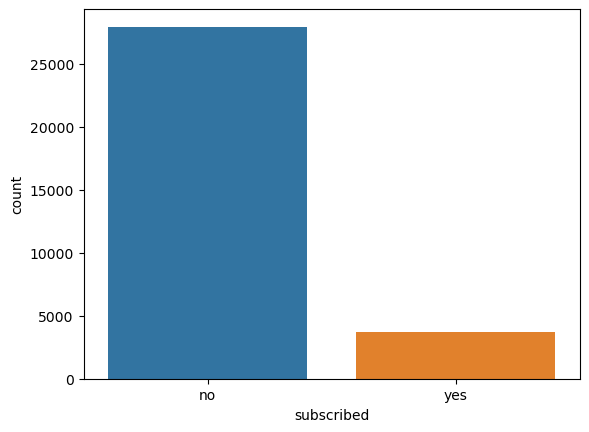

In [131]:
# Visualize the target variable
print(train['subscribed'].value_counts(normalize=True))
sns.countplot(x='subscribed',data=train)
plt.show()

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%.

We can observe that the count of "No" are high comparedto the count of "Yes". This leads imbalance issue in the data. we will rectify it by using oversampling method.

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


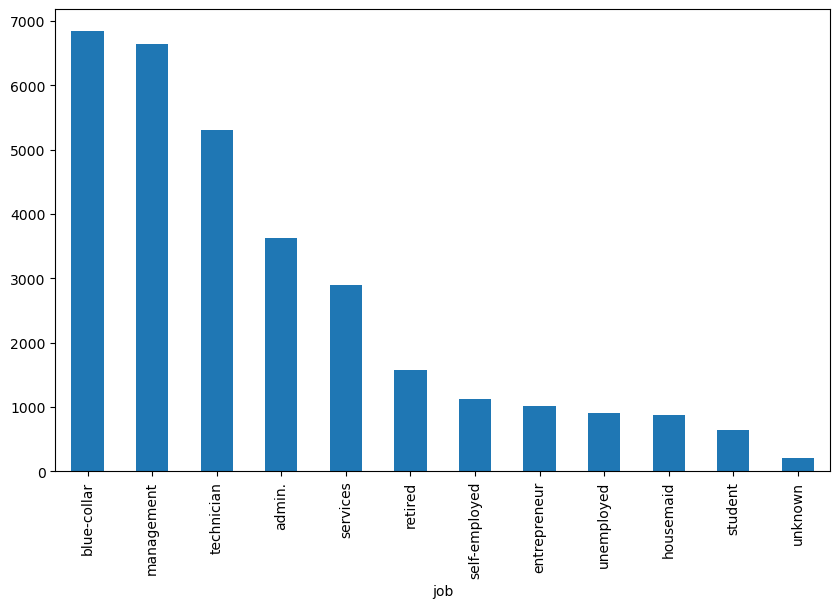

In [132]:
 # Plotting the job frequency table of train dataset
print(train['job'].value_counts())
train['job'].value_counts().plot(kind='bar', figsize=(10,6))
plt.show()

We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


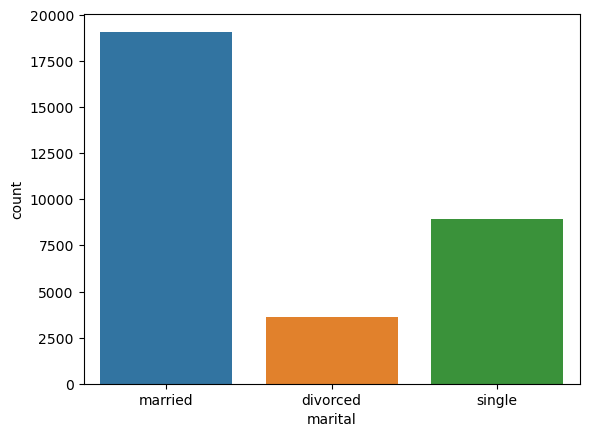

In [133]:
# Visualize the count of marital column
print(train['marital'].value_counts())
sns.countplot(x='marital',data=train)
plt.show()

We can observe that married has more  than divoced and single.

education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


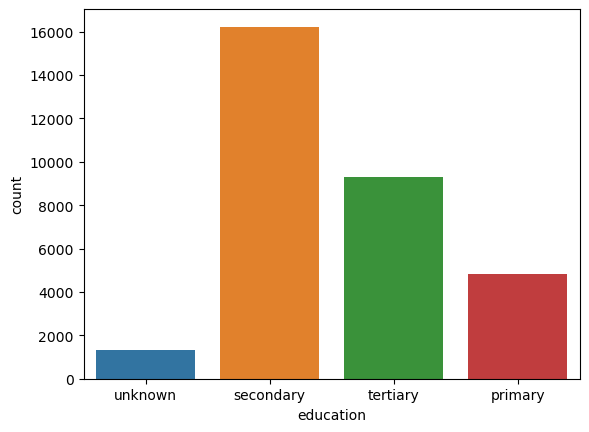

In [134]:
# Visualize the count of education column
print(train['education'].value_counts())
sns.countplot(x='education',data=train)
plt.show()

The secondary educaiton has high in count.

default
no     31062
yes      585
Name: count, dtype: int64


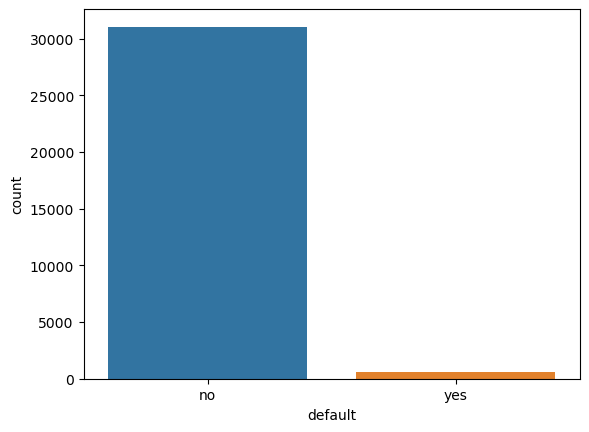

In [135]:
# Visualize the count of default column
print(train['default'].value_counts())
sns.countplot(x='default',data=train)
plt.show()

"No" dafaults has bit high is count of cusomters having "Yes".

housing
yes    17584
no     14063
Name: count, dtype: int64


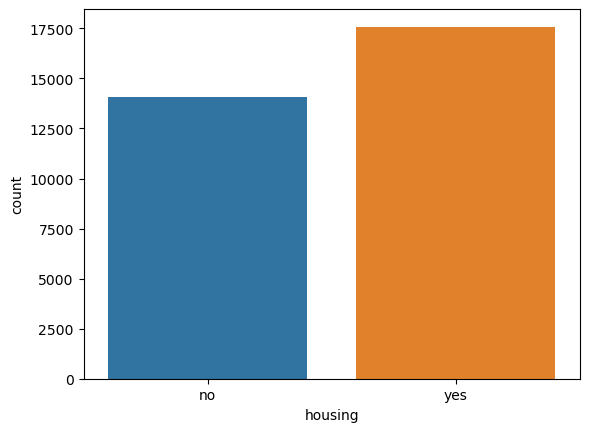

In [136]:
# Visualize the count of housing column
print(train['housing'].value_counts())
sns.countplot(x='housing',data=train)
plt.show()

We can observe that the they have house and they have not house are almost same.

loan
no     26516
yes     5131
Name: count, dtype: int64


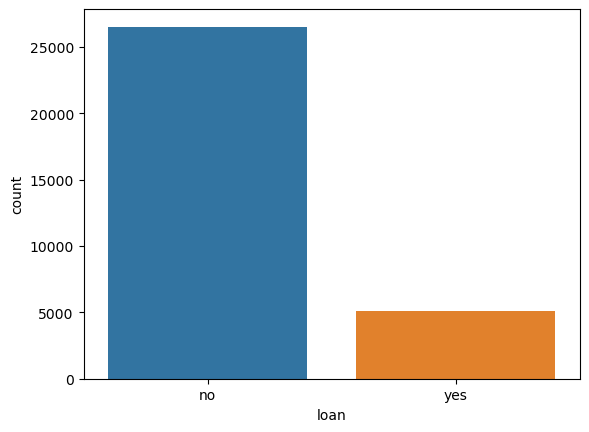

In [137]:
# Visualize the count of loan column
print(train['loan'].value_counts())
sns.countplot(x='loan',data=train)
plt.show()

They do have any loan has bit high than they having a loan.

contact
cellular     0.645338
unknown      0.289980
telephone    0.064682
Name: proportion, dtype: float64


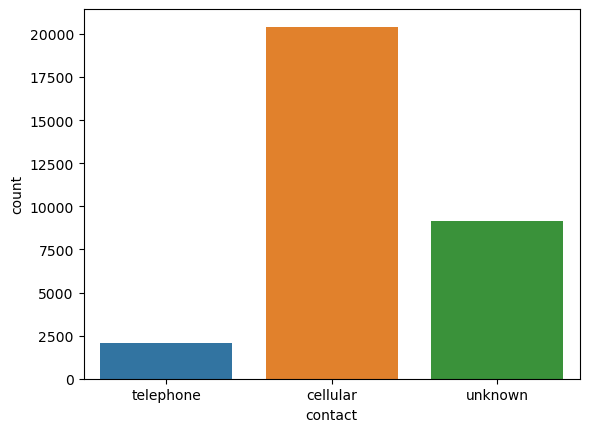

In [138]:
# Visualize the count of contact column
print(train['contact'].value_counts(normalize=True))
sns.countplot(x='contact',data=train)
plt.show()

The 65% has cellular contact.

poutcome
unknown    0.819319
failure    0.106234
other      0.040699
success    0.033747
Name: proportion, dtype: float64


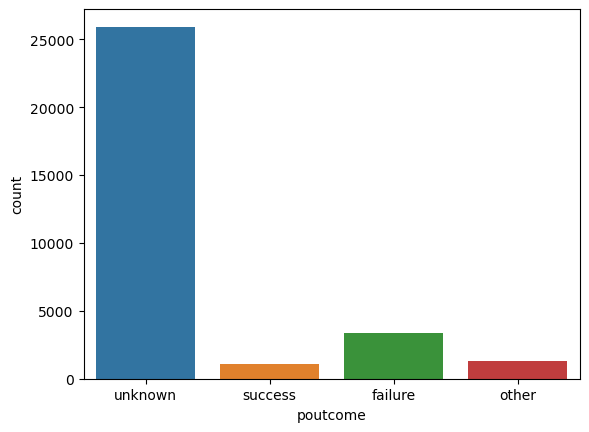

In [139]:
# Visualize the count of contact column
print(train['poutcome'].value_counts(normalize=True))
sns.countplot(x='poutcome',data=train)
plt.show()

We observe that 80% data unknown so we can remove it letter.

has_contacted
False    0.819161
True     0.180839
Name: proportion, dtype: float64


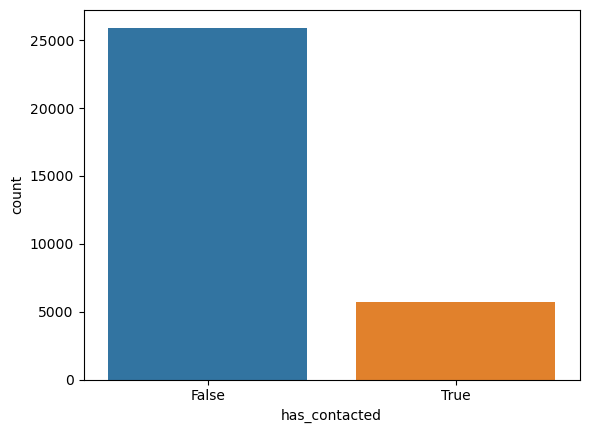

In [140]:
# Visualize the count of has_contacted column
print(train['has_contacted'].value_counts(normalize=True))
sns.countplot(x='has_contacted',data=train)
plt.show()

We observe that has_contacted column has frequency of those which has never contacted is very high.

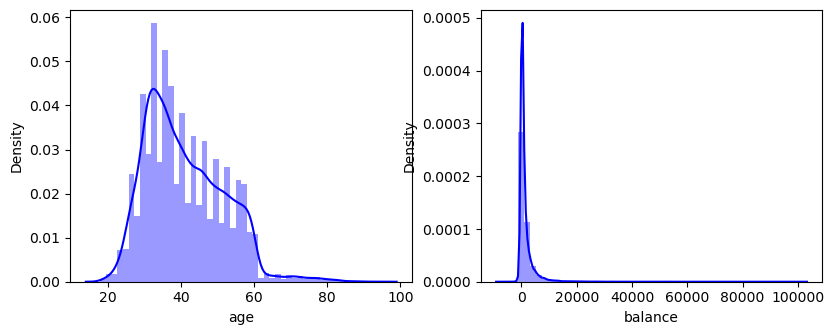

In [141]:
# Let's see how the data gas been distributed each numerical column
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train[col],color='b')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

From the baove distribution plots we can notice that the data not normal distributed except day columns.

### Bivariate Analysis

<Axes: xlabel='subscribed', ylabel='age'>

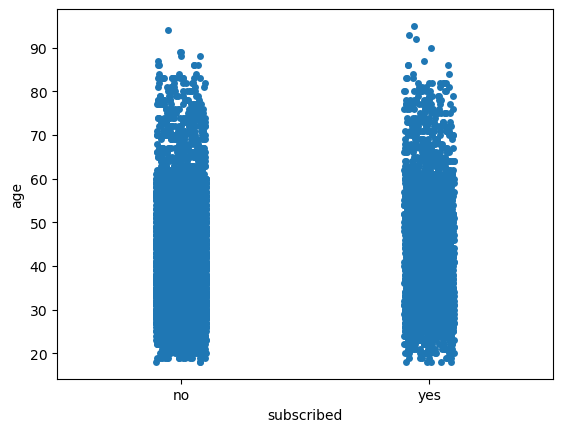

In [142]:
# Comparing age vs subscribed
sns.stripplot(y='age',x='subscribed',data=train)

There is no signification difference between the feature and target columns.

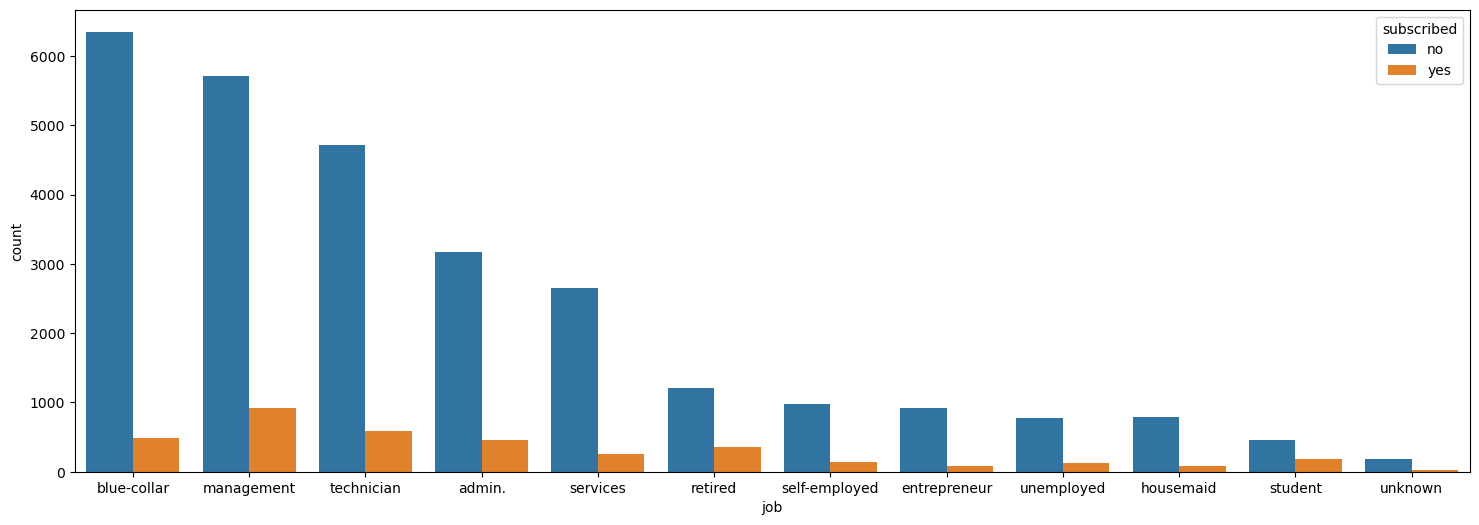

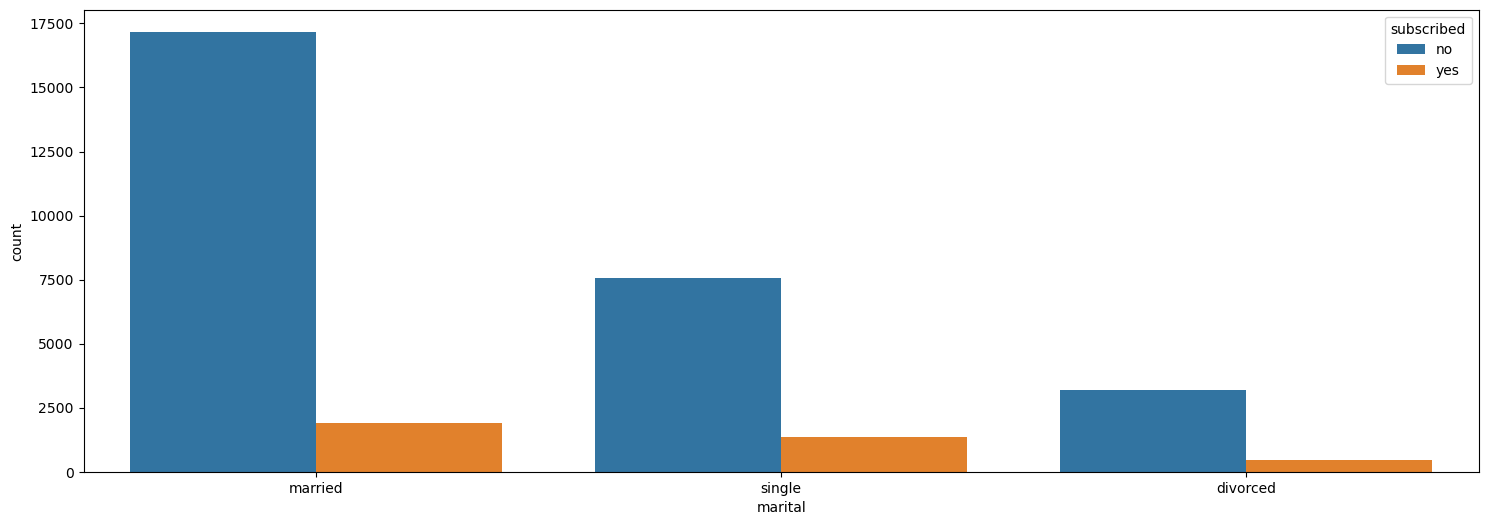

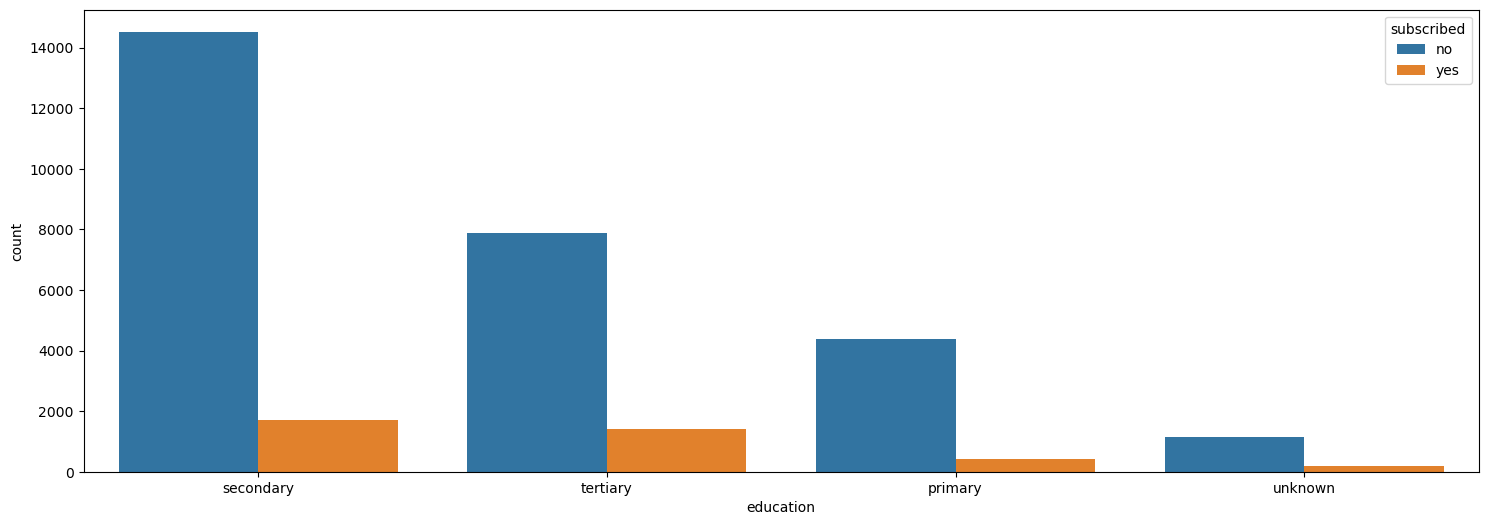

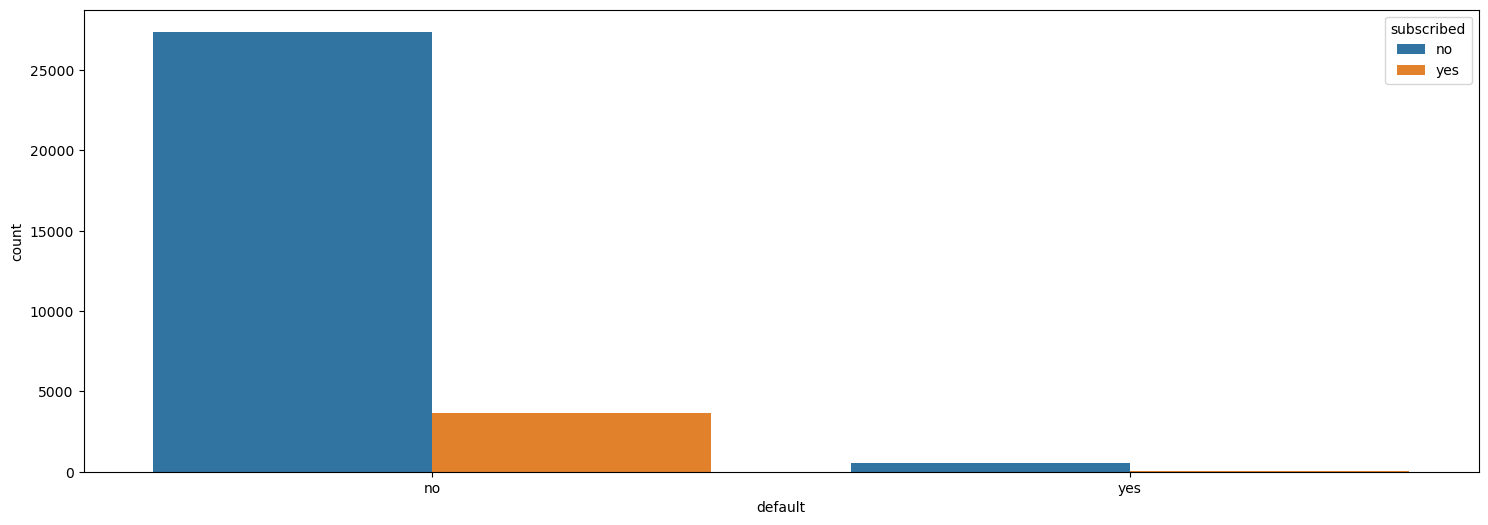

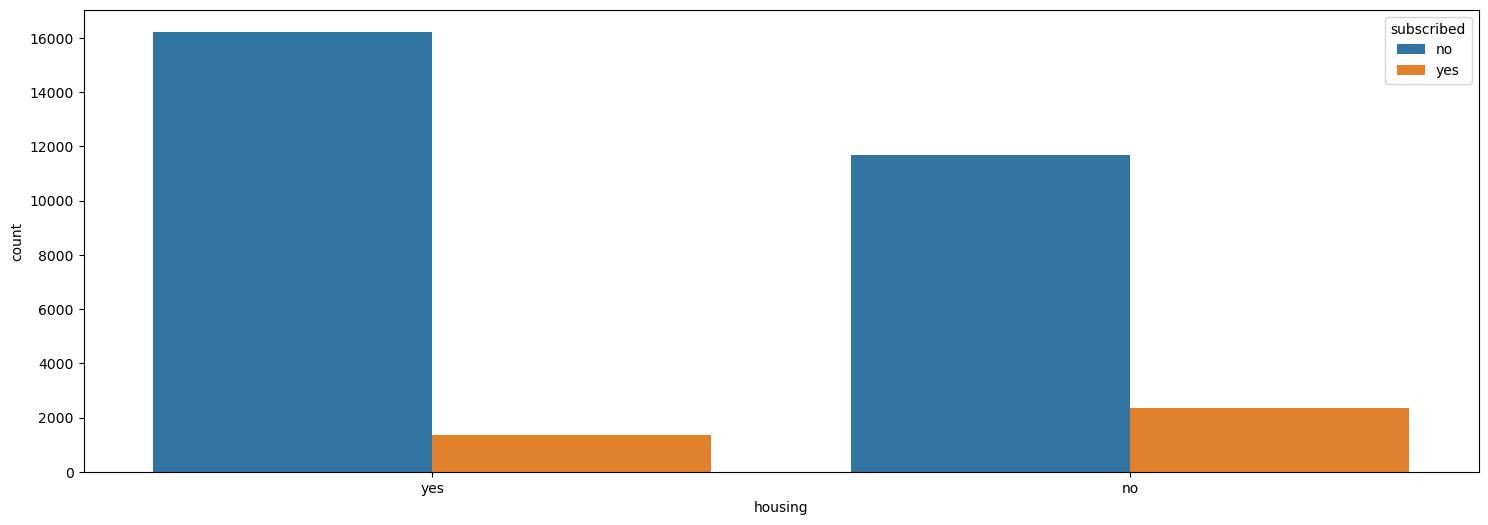

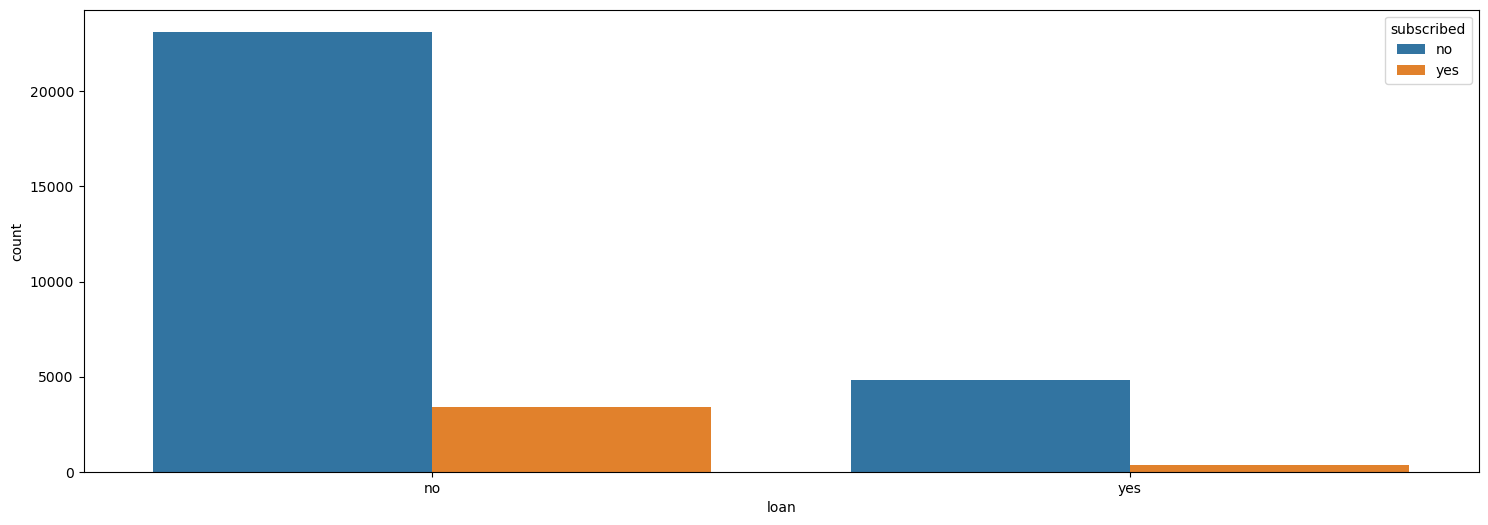

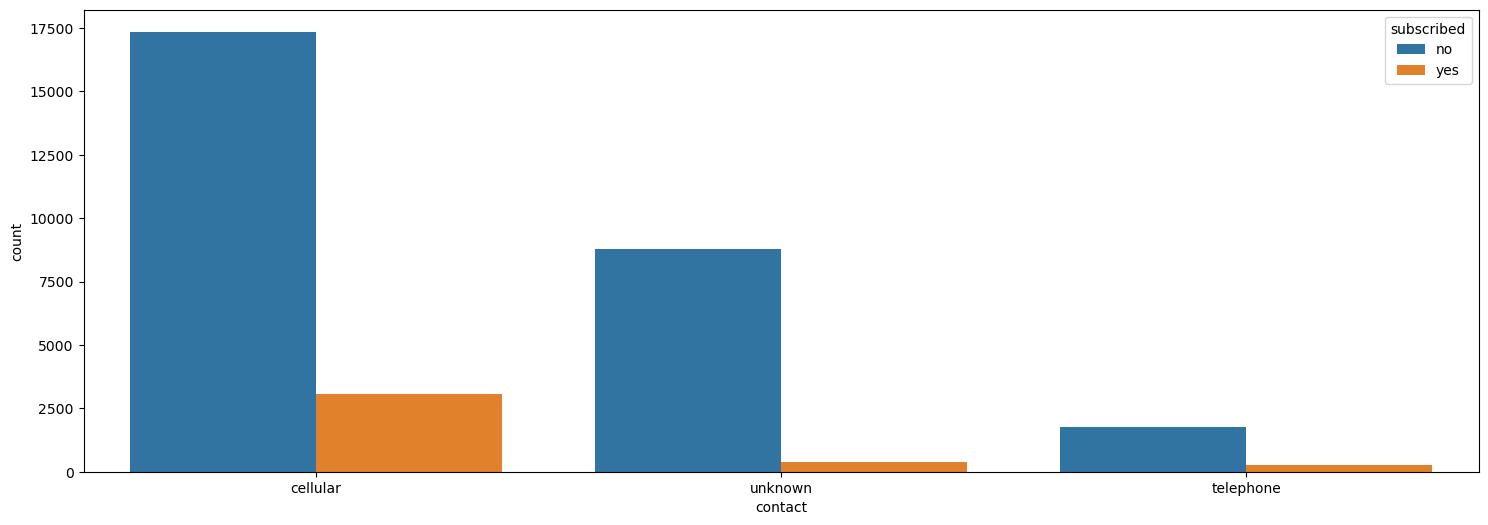

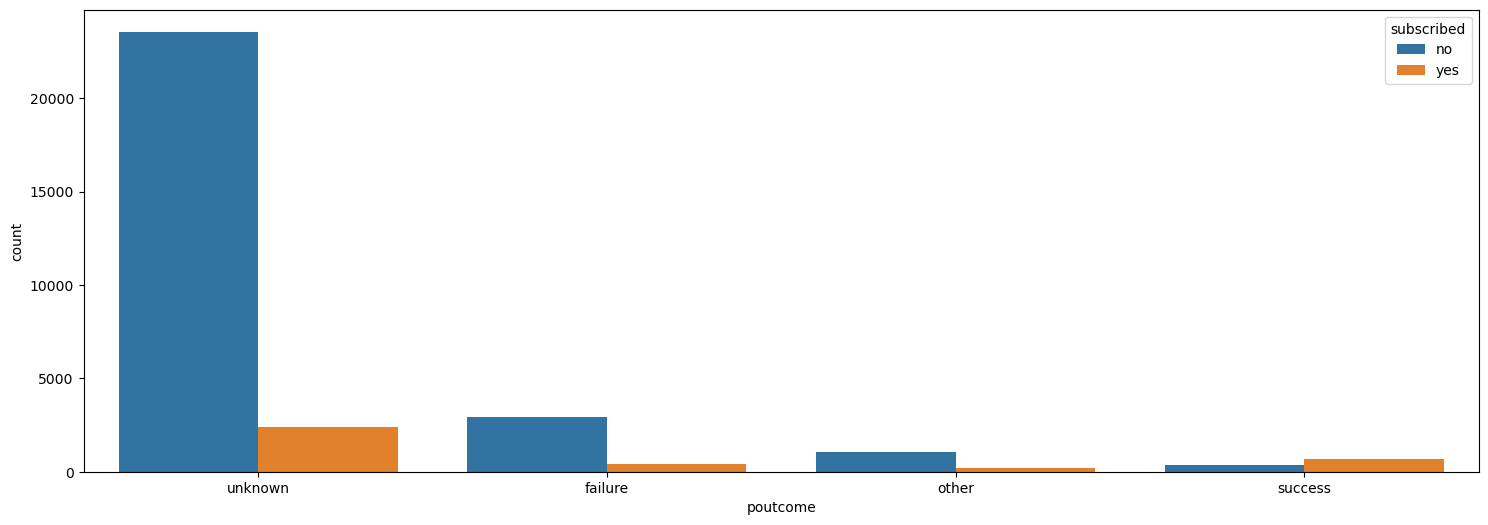

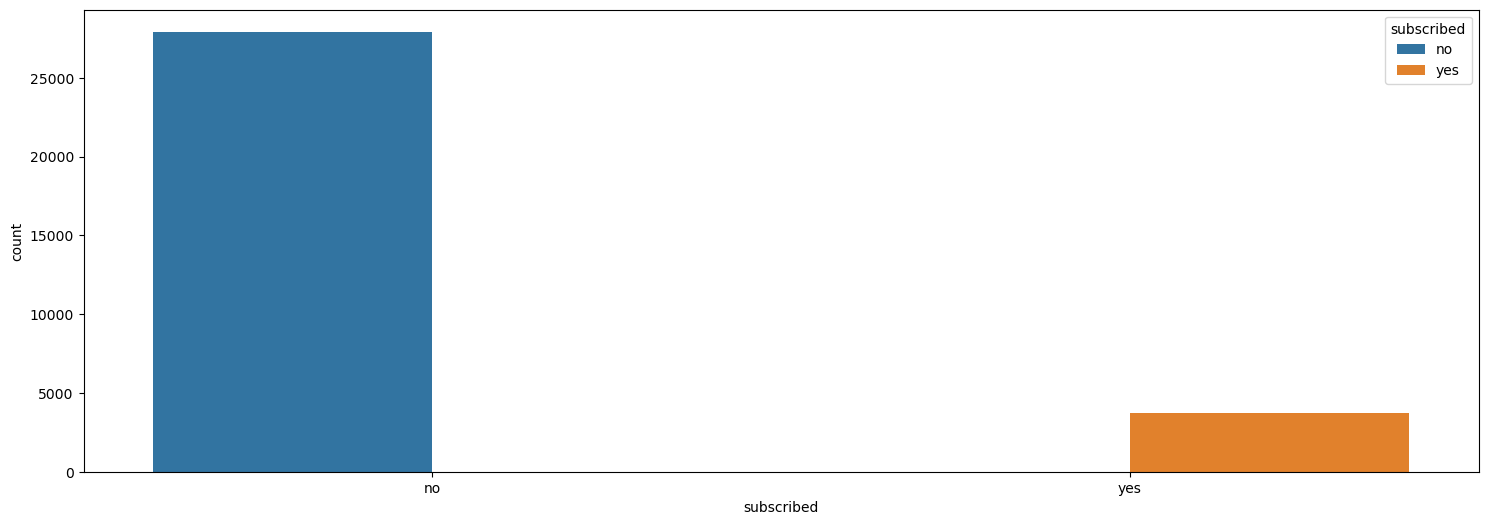

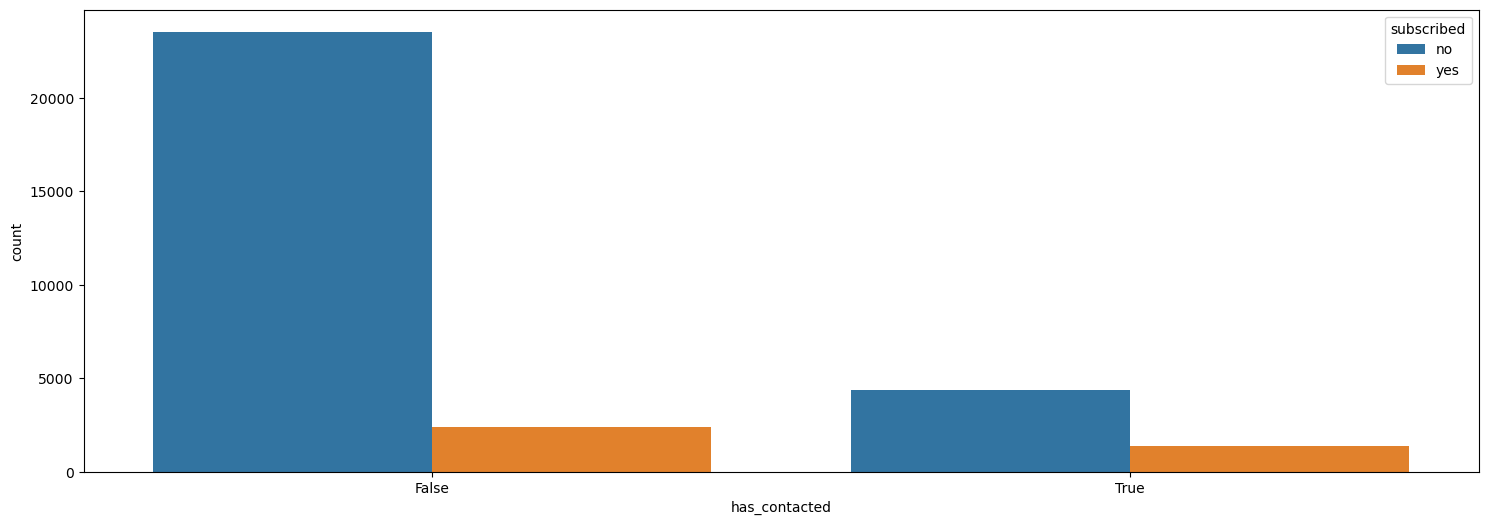

In [143]:
# Relationships of Categorical Features with Target

for c in categorical_col:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='subscribed',data = train,order = train[c].value_counts().index) #individual bars sorted acc to frequency and then plotted


1. In the first plot we can see job wise no signficant different which has subscribed but they has no subseribed very much different.
2. In thet plot we can see the count of married has not subscribed then single, but the ratio of subscribed married and single almost same.
3. In education columns the secondary level has not subsribed has very high count. and has subscribed in secondary and tertiary has almost same.
4. They no defaults and they no subscribe has high count.
5. We can see thre is no signficant difference in the housing, both the genders have equal subscribed level.
6. We can notice the customers who have no loan have high they have not subscribed.
7. The contact with cellular is very high those not subscribed.
8. We can see the 80% data has unknown.
9. The count of those which has not subscribed but they contacted has high.

**We can see many columns has unknown so we can remove those rows. beacuse no data not use.**

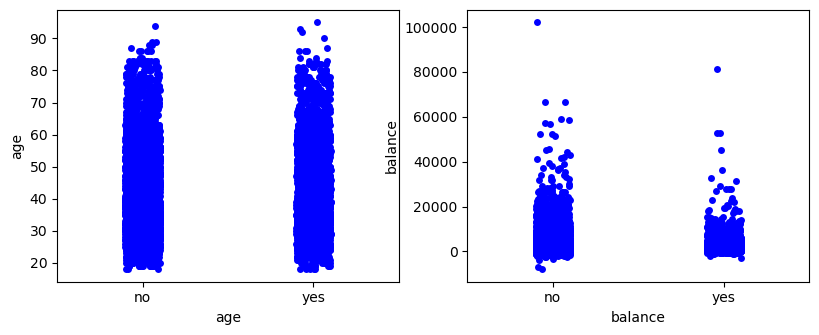

In [144]:
# Let's check the relationship all columns vs target
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y=col,x='subscribed',data=train,color='b')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

All the features are alright except previous has seems no much contribution.

### Multivariate Analysis

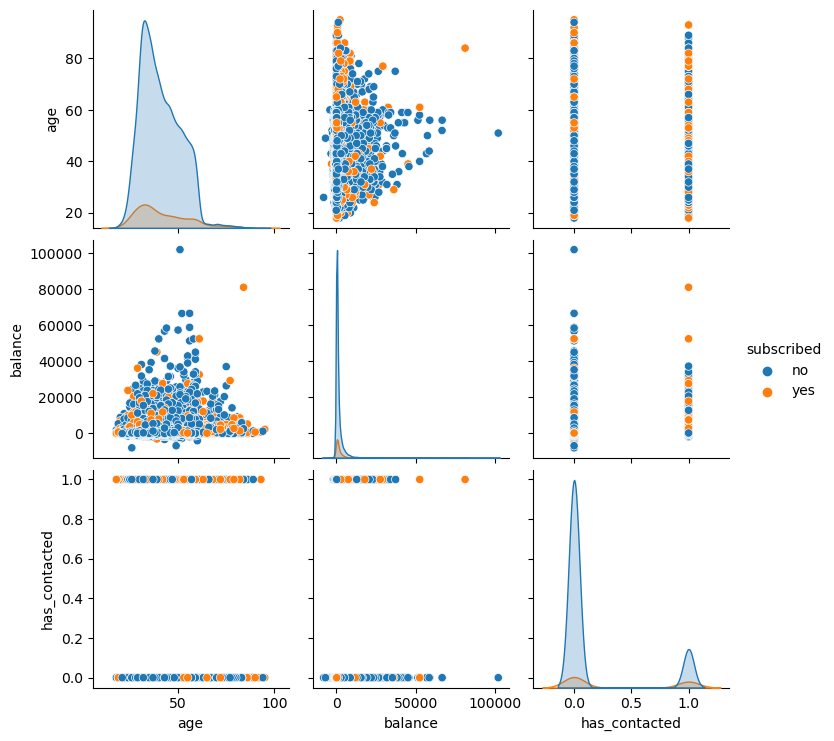

In [145]:
sns.pairplot(train,hue='subscribed')
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target columns.

## Checking the outliers

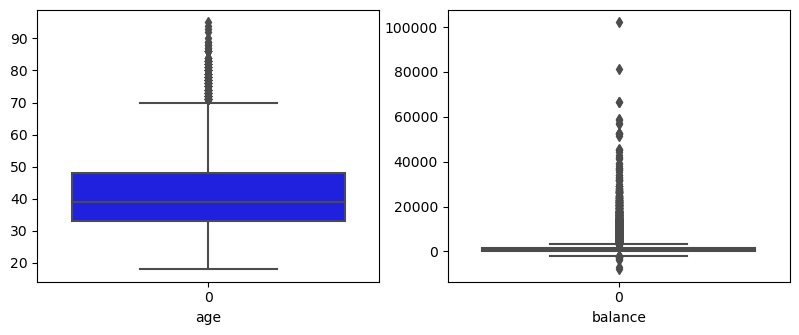

In [146]:
# Let's check the outliers by plotting boxplot
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(train[col],color='b')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

It'seem all the columns has outliers except day.

So we need to remove the outliers using zscore and IQR techniques before building the model and select the best one.

In [147]:
numerical_col

['age', 'balance']

### Checking the outliers by using zscore method

In [148]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore

train_features = train[['age', 'balance']]
z = np.abs(zscore(train_features))        # Apply the formula and get the scaled data

Thersholds = 3

train1 = train[(z<3).all(axis=1)]

train1.shape

(30857, 12)

In [149]:
# Shape of old and New Dataframe
print("Old Data Frame - ",train.shape[0])
print("New Data Frame - ",train1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((train.shape[0] - train1.shape[0])/train.shape[0])*100)

Old Data Frame -  31647
New Data Frame -  30857

Data Loss Percentage After removing outliers with zscore method -
  2.4962871678200145


It is affordable loss of data now we will check with IQR method

### Checking the outliers by using IQR metohd

In [150]:
# 1st quantile 
Q1 = train_features.quantile(0.25)

# 3rd quantile
Q3 = train_features.quantile(0.75)

#IQR
IQR = Q3 - Q1

train2 = train[~((train_features<(Q1 - 1.5 * IQR)) |(train_features>(Q3 + 1.5 * IQR))).any(axis=1)]

In [151]:
train2.shape

(28087, 12)

In [152]:
# Shape of old and New Dataframe
print("Old Data Frame - ",train.shape[0])
print("New Data Frame - ",train2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((train.shape[0] - train2.shape[0])/train.shape[0])*100)

Old Data Frame -  31647
New Data Frame -  28087

Data Loss Percentage After removing outliers with zscore method -
  11.249091541062343


In [153]:
# train update with train1 
train = train1

In [154]:
train.shape

(30857, 12)

We use zscore method because its Loss less data then IQR method

### Checking how the data has been distributed in each column

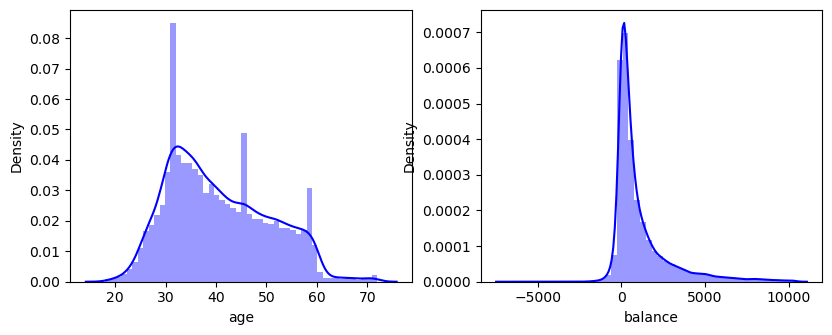

In [155]:
# Let's see how the data gas been distributed each numerical column
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train[col],color='b')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

From the above distribution plots we can notice that the data not looks normal in all the columns except age,day,duration. Let's check the skewness.

## Featue Selection and Engineering

### Dropping rows with ‘unknown’ values for any categorical column 

In [156]:
# Dropping rows with 'unknown' values for any categorical column in train dataset

index_names= train[(train.job == 'unknown') | (train.education == 'unknown')].index
print(index_names)

train.drop(index_names, inplace = True) 
train.shape

Index([    0,     1,    46,    61,    63,    95,   107,   119,   154,   201,
       ...
       31475, 31491, 31518, 31527, 31540, 31543, 31563, 31577, 31589, 31619],
      dtype='int64', length=1369)


(29488, 12)

In [157]:
# Dropping rows with 'unknown' values for any categorical column in test dataset

index_names= test[(test.job == 'unknown') | (test.education == 'unknown')].index
print(index_names)

test.drop(index_names, inplace = True) 
test.shape

Index([   14,    51,    98,   184,   202,   207,   260,   275,   316,   374,
       ...
       13282, 13288, 13324, 13352, 13371, 13443, 13446, 13447, 13499, 13518],
      dtype='int64', length=595)


(12969, 11)

**We see some columns has value unknown so it mean no information no use. also see poutcome has poutcome columns has 80% data has unknown so we remove it.**

In [158]:
# Checking value of unknown in poutcome columns in train dataset

train['poutcome'].value_counts(normalize='True')*100

poutcome
unknown    82.067282
failure    10.645008
other       4.096582
success     3.191129
Name: proportion, dtype: float64

In [159]:
# Checking value of unknown in poutcome columns in train dataset

test['poutcome'].value_counts(normalize='True')*100

poutcome
unknown    81.247590
failure    11.450382
other       4.071247
success     3.230781
Name: proportion, dtype: float64

In [160]:
# Train dataset
train = train.drop(columns=['poutcome'],axis=1)

# Test dataset
test = test.drop(columns=['poutcome'],axis=1)

**poutcome has 80% data has unknown. so let's drop these!**

In [161]:
print("Train dataset",train.shape)
print("Test dataset",test.shape)

Train dataset (29488, 11)
Test dataset (12969, 10)


## Checking the skewness

In [163]:
print(train['age'].skew())
print(train['balance'].skew())

0.4771655650348453
2.448707935011946


In age columns we not need to skewness.

### Remove the skewness

In [164]:
from scipy.stats import boxcox
train['balance'] = np.cbrt(train['balance'])

In [165]:
print(train['balance'].skew())

-0.4382133989077438


The column balance is sucessfully skewed in the range.

## Encoding categorical columns

In [166]:
# Replacing no and yes by 0 and 1 respectively as our target values!
train['subscribed'] = train['subscribed'].replace(['no','yes'],[0,1])
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,subscribed,has_contacted
2,27,services,married,secondary,no,9.622603,yes,no,cellular,0,False
3,57,management,divorced,tertiary,no,14.868480,no,no,cellular,1,True
4,31,technician,married,secondary,no,4.918685,yes,no,cellular,0,False
5,33,management,single,tertiary,no,0.000000,yes,no,cellular,0,False
6,56,retired,married,secondary,no,10.144567,no,no,telephone,1,False


**Encoding categorical column using OrdianlEncoder**

In [169]:
# Encoding categorical columns in train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in train.columns:
    if train[i].dtypes == 'object':
        train[i] = OE.fit_transform(train[i].values.reshape(-1,1))
        
train.head()        

,age,job,marital,education,default,balance,housing,loan,contact,subscribed,has_contacted
2,27,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.0,0,0.0
3,57,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.0,1,1.0
4,31,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.0,0,0.0
5,33,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,0,0.0
6,56,5.0,1.0,1.0,0.0,10.144567,0.0,0.0,1.0,1,0.0


In [170]:
# Encoding categorical columns in test dataset
OE = OrdinalEncoder()

for i in test.columns:
    if test[i].dtypes == 'object':
        test[i] = OE.fit_transform(test[i].values.reshape(-1,1))
        
test.head() 

,age,job,marital,education,default,balance,housing,loan,contact,has_contacted
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,0.0
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,0.0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,0.0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,0.0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,0.0


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29488 entries, 2 to 31646
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            29488 non-null  int64  
 1   job            29488 non-null  float64
 2   marital        29488 non-null  float64
 3   education      29488 non-null  float64
 4   default        29488 non-null  float64
 5   balance        29488 non-null  float64
 6   housing        29488 non-null  float64
 7   loan           29488 non-null  float64
 8   contact        29488 non-null  float64
 9   subscribed     29488 non-null  int64  
 10  has_contacted  29488 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.7 MB


In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12969 entries, 0 to 13563
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            12969 non-null  int64  
 1   job            12969 non-null  float64
 2   marital        12969 non-null  float64
 3   education      12969 non-null  float64
 4   default        12969 non-null  float64
 5   balance        12969 non-null  int64  
 6   housing        12969 non-null  float64
 7   loan           12969 non-null  float64
 8   contact        12969 non-null  float64
 9   has_contacted  12969 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.1 MB


## Correlation 

### Correlation in train dataset

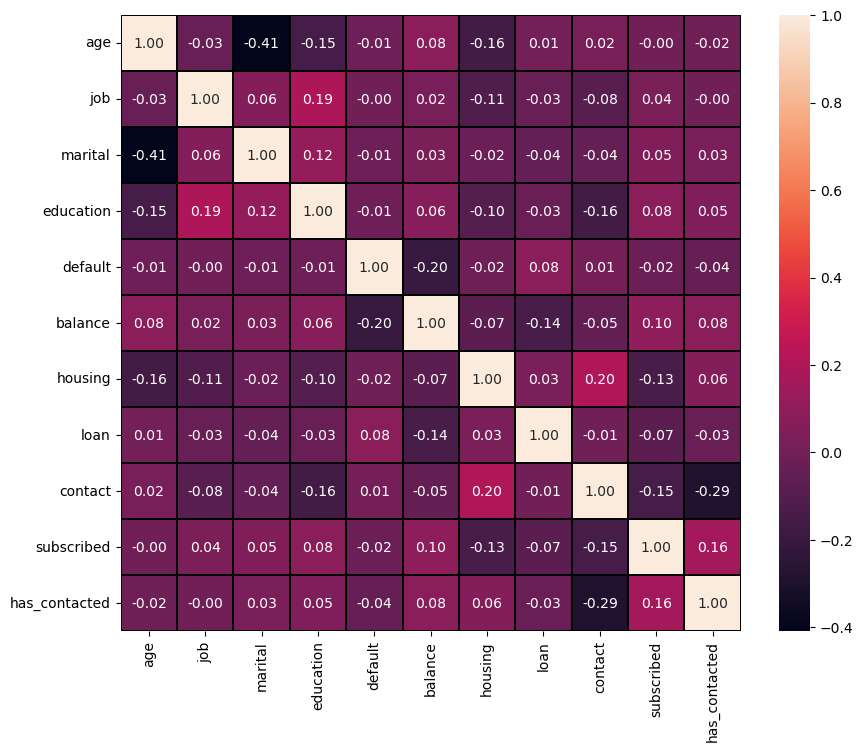

In [173]:
# correlation between target vs feature and feature vs feature
train_corr = train.corr()

# Plot correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,annot=True,annot_kws={'size':10},fmt='0.2f',linewidths=0.2,linecolor='black')
plt.show()

This heatmap contains both positive and negative correlation in train dataset:

   1. There is no much correlation between target and features
   2. The columns previous have positive correlation with has_contacted.
   3. The columns marital have negative correaltion with has_contacted.

### Correlation in test dataset

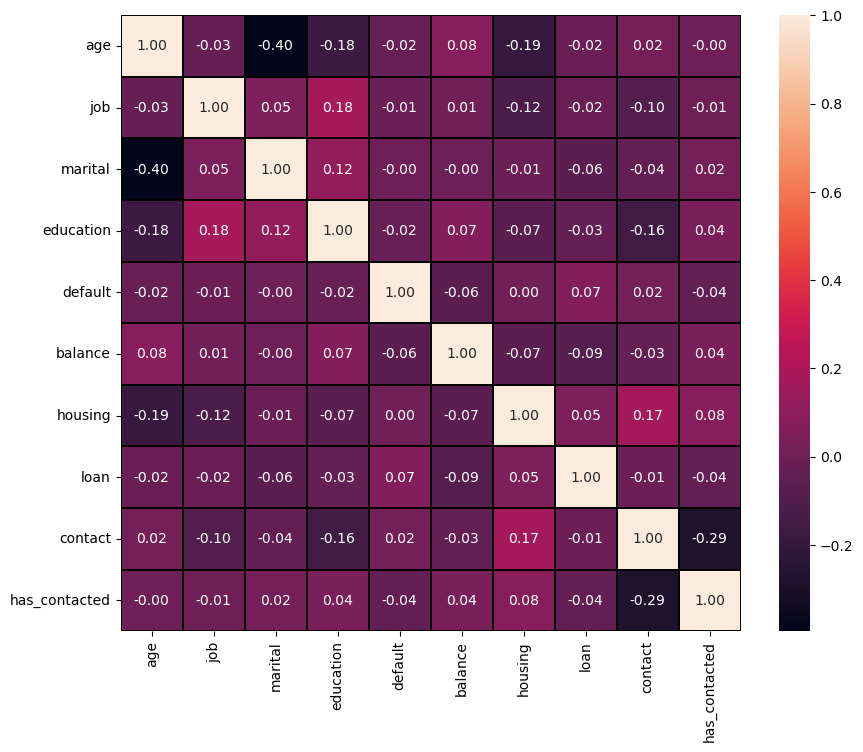

In [174]:
# correlation between target vs feature and feature vs feature
test_corr = test.corr()

# Plot correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(test_corr,annot=True,annot_kws={'size':10},fmt='0.2f',linewidths=0.2,linecolor='black')
plt.show()

This heatmap contains both positive and negative correlation in train dataset:

   1. In this only feature are Available.
   2. The columns previous have positive correlation with has_contacted.
   3. The columns marital have negative correaltion with has_contacted.

**Train dataset**

In [175]:
# Ckecking correlation feature vs target 
train.corr()['subscribed'].sort_values(ascending=False).drop('subscribed')

has_contacted    0.163987
balance          0.095556
education        0.078789
marital          0.052246
job              0.035767
age             -0.001582
default         -0.020073
loan            -0.070856
housing         -0.134797
contact         -0.145757
Name: subscribed, dtype: float64

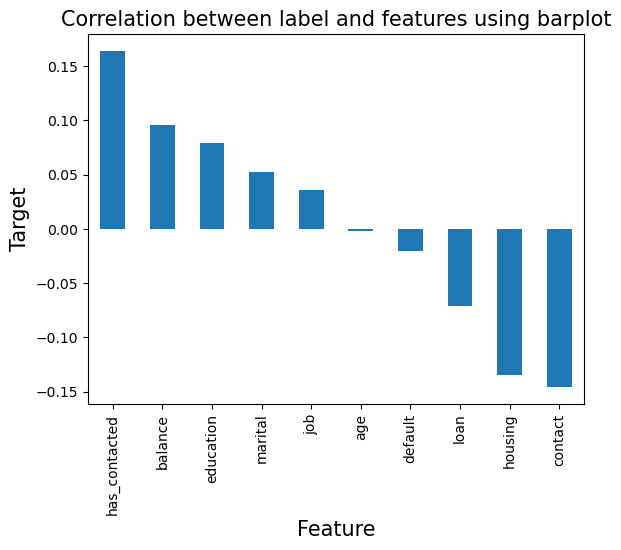

In [176]:
# LET' visualize its using barplot
train.corr()['subscribed'].sort_values(ascending=False).drop('subscribed').plot(kind='bar')
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=15)
plt.show()

It's seems some columns has not much relationship with target.

## Sparating feature and target

In [177]:
x = train.drop(columns=['subscribed'],axis=1)
y = train['subscribed']

subscribed
0    26131
1     3357
Name: count, dtype: int64


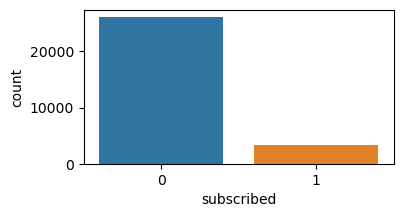

In [178]:
print(y.value_counts())
plt.figure(figsize=(4,2))
sns.countplot(x = y,data = train)
plt.show()

We assume that after convert into binary classification the target data has inbalance. Let do it balance using oversampling.

## Oversampling

In [179]:
# Balance of inbalance data of target variable
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

subscribed
0    26131
1    26131
Name: count, dtype: int64


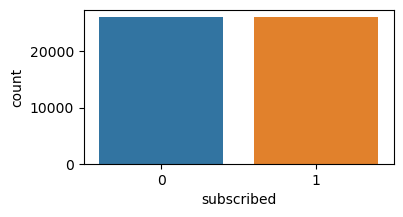

In [180]:
# Checking value count of target column
print(y1.value_counts())
plt.figure(figsize=(4,2))
sns.countplot(x = y1, data = train)
plt.show()

Now the data is balanced.

## Feature Scaling using Standard Scalarization

In [181]:
# Feature scaling on train dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x.columns)

x1.shape

(52262, 10)

In [233]:
# Feature scaling on test dataset

scaler = StandardScaler()
test = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)

test.shape

(12969, 10)

We have scaled the data using Standard Scalaization method to overcome the isse of biasness.

## Checking Variance Inflation Factor (VIF)

In [182]:
# Find the variance inflation factor in each scaled columns i.e x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF value'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif

,Feature,VIF value
0,age,6.144718
1,job,2.793978
2,marital,3.834296
3,education,3.939428
4,default,1.064795
5,balance,2.478439
6,housing,2.291029
7,loan,1.221731
8,contact,1.744811
9,has_contacted,1.357717


We can see that there are no Multicollinearity issue.

## Model Building

In [183]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding the best random state

In [184]:
maxAccu = 0
maxRs = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  67.79427521812337 at random_state 69


## Creating train test split

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=maxRs)

In [186]:
LR  = LogisticRegression()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

## Applying all Classification Model

In [187]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',name,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', acc_score)
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    print('\n')
    print('=========================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression is


Accuracy Score :
 0.6779427521812338


Confusion matrix : 
 [[4212 2305]
 [1903 4646]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.65      0.67      6517
           1       0.67      0.71      0.69      6549

    accuracy                           0.68     13066
   macro avg       0.68      0.68      0.68     13066
weighted avg       0.68      0.68      0.68     13066



Classification ML Algorithm Evaluation Matrix KNeighbors is


Accuracy Score :
 0.8465482932802694


Confusion matrix : 
 [[5484 1033]
 [ 972 5577]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      6517
           1       0.84      0.85      0.85      6549

    accuracy                           0.85     13066
   macro avg       0.85      0.85      0.85     13066
weighted avg       0.85      0.85    

## Cross Validation

In [188]:
for name,model in models.items():
    
    print('\033[1m', name, '\033[0m\n')
    score = cross_val_score(model, x1, y1, cv =5)
    print('Accuracy Score              :',acc_score)
    print("Cross Validation Score      :",score)
    print("Cross Validation Mean Score :",score.mean())
        
    final = acc_score - score.mean()
    print('Different between Accuracy vs Cross Val Score:',final)
    
    print('==============================================================================')

 LogisticRegression 

Accuracy Score              : 0.9054798714220114
Cross Validation Score      : [0.65588826 0.67186454 0.67365098 0.68101799 0.66963261]
Cross Validation Mean Score : 0.6704108734634857
Different between Accuracy vs Cross Val Score: 0.23506899795852565
 KNeighbors 

Accuracy Score              : 0.9054798714220114
Cross Validation Score      : [0.79221276 0.87324213 0.8775354  0.87236892 0.87849215]
Cross Validation Mean Score : 0.8587702744949611
Different between Accuracy vs Cross Val Score: 0.046709596927050234
 DecisionTree 

Accuracy Score              : 0.9054798714220114
Cross Validation Score      : [0.76159954 0.91944896 0.9134137  0.91207424 0.91618829]
Cross Validation Mean Score : 0.8845449474071408
Different between Accuracy vs Cross Val Score: 0.020934924014870515
 ExtraTree 

Accuracy Score              : 0.9054798714220114
Cross Validation Score      : [0.77260117 0.91294365 0.91905855 0.90729047 0.91963261]
Cross Validation Mean Score : 0.886305289

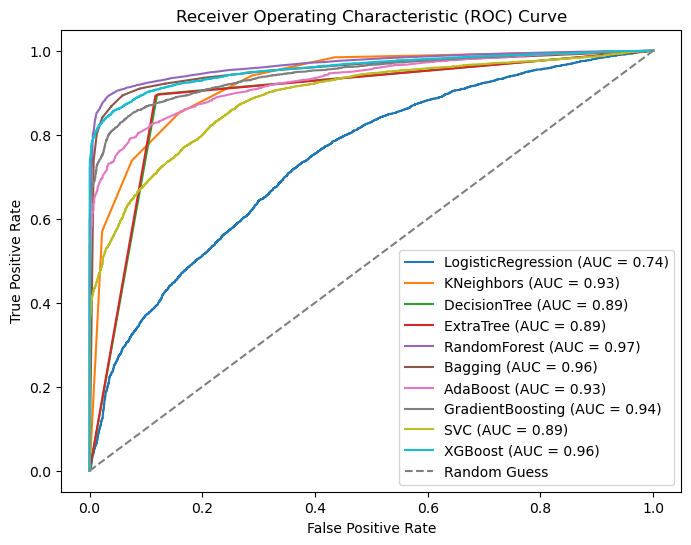

In [189]:
# Calculate the ROC curves and AUC scores for each model
plt.figure(figsize=(8,6))
for name,model in models.items():                 # Reading key and values from the items
    model.fit(x_train, y_train)                   # Each Model traning
    y_prob = model.predict_proba(x_test)[:, 1]    # Predict Prob of each model
    fpr, tpr,_ =roc_curve(y_test,y_prob)          # Finding False and True positive rate(' - ' is threshold)
    roc_auc = auc(fpr, tpr)                       # auc score of each model captured
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label = '{} (AUC = {:.2f})'.format(name, roc_auc))
    
# Add Labels and legend to the plot
plt.plot([0,1], [0,1], linestyle='--',color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Shiw the plot
plt.show()

**We can see that XGBoost gives less error between accuracy score and CrossValidation.**

Accuracy Score : 0.9054798714220114 %
 
Cross Val Score : 0.9011161582750686 %

Different between R2 score vs Cross Val Score:
 0.004363713146942727

### XGBoost  is out best Model

# Hyper Parameter Tuning : GridSearchCV

In [234]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'learning_rate': [0.01,0.02],
                'subsample'    : [0.7,0.5],
                'n_estimators' : [100,250],
                'max_depth'    : [4,6,8,10],
             }

GCV = GridSearchCV(estimator = XGB, param_grid=param_grid, n_jobs = -1)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Best score :  0.8979744103917877


## Final Model

In [235]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)                                       
print('\033[1m'+'Final Model' +'\033[0m')
print('\nAccuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

Final Model

Accuracy Score 0.9001224552273075

Confusion matrix :
 [[6247  270]
 [1035 5514]]

Classification report :
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6517
           1       0.95      0.84      0.89      6549

    accuracy                           0.90     13066
   macro avg       0.91      0.90      0.90     13066
weighted avg       0.91      0.90      0.90     13066



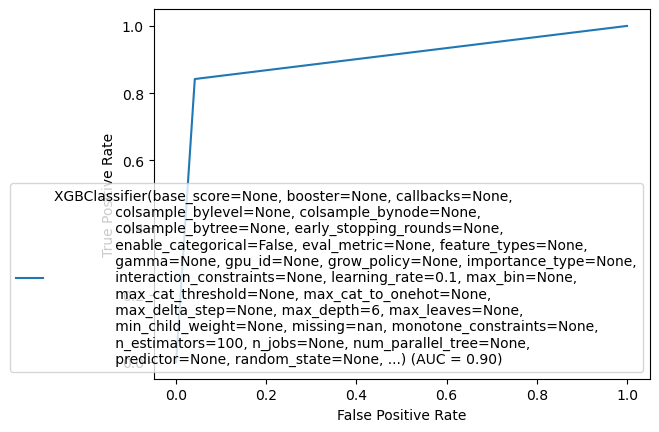

In [236]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 100%

## Saving Model

In [237]:
import joblib
joblib.dump(Final_mod,'BANK_MARKETING_Final.pkl')

['BANK_MARKETING_Final.pkl']

## Predicting the saved model

In [238]:
# Let's load the saved model and get the predictions
model = joblib.load("BANK_MARKETING_Final.pkl")

# Prediction on test dataset
prediction = model.predict(test)
prediction

array([1, 1, 1, ..., 1, 1, 1])